# Exercise 2: Non-Linearity in Higher Dimensions

Generate 5D data and use PCA to analyze linear separability in 2D projection.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Generate 5D data for 2 classes (500 samples each)
# Class A: Mean at origin, identity covariance
mean_A = np.zeros(5)
cov_A = np.eye(5)
class_A = np.random.multivariate_normal(mean_A, cov_A, 500)

# Class B: Mean shifted, with correlation
mean_B = np.array([2, 1, -1, 0, 1])
cov_B = np.array([
    [1.5, 0.5, 0, 0, 0],
    [0.5, 1.5, 0, 0, 0],
    [0, 0, 1, 0.3, 0],
    [0, 0, 0.3, 1, 0],
    [0, 0, 0, 0, 1]
])
class_B = np.random.multivariate_normal(mean_B, cov_B, 500)

# Combine data
X_5d = np.vstack([class_A, class_B])
y = np.hstack([np.zeros(500), np.ones(500)])

print(f"5D Dataset shape: {X_5d.shape}")
print(f"Labels shape: {y.shape}")
print(f"Class distribution: {np.bincount(y.astype(int))}")

5D Dataset shape: (1000, 5)
Labels shape: (1000,)
Class distribution: [500 500]


In [3]:
# Manual standardization
def standardize(X):
    """Manually standardize features to zero mean and unit variance"""
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

# Manual PCA implementation
def manual_pca(X, n_components=2):
    """Manual PCA implementation"""
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    
    # Compute covariance matrix
    cov_matrix = np.cov(X_centered.T)
    
    # Compute eigenvalues and eigenvectors
    eigenvals, eigenvecs = np.linalg.eigh(cov_matrix)
    
    # Sort by eigenvalues (descending)
    idx = np.argsort(eigenvals)[::-1]
    eigenvals = eigenvals[idx]
    eigenvecs = eigenvecs[:, idx]
    
    # Select top n_components
    components = eigenvecs[:, :n_components]
    
    # Transform data
    X_transformed = X_centered @ components
    
    # Calculate explained variance ratio
    explained_variance_ratio = eigenvals[:n_components] / np.sum(eigenvals)
    
    return X_transformed, explained_variance_ratio, components

# Standardize the 5D data
X_scaled, mean_vals, std_vals = standardize(X_5d)

# Apply manual PCA to reduce to 2D
X_2d, explained_var_ratio, components = manual_pca(X_scaled, n_components=2)

print(f"Explained variance ratio: {explained_var_ratio}")
print(f"Total explained variance: {sum(explained_var_ratio):.3f}")
print(f"PCA components shape: {components.shape}")

Explained variance ratio: [0.35579835 0.20932213]
Total explained variance: 0.565
PCA components shape: (5, 2)


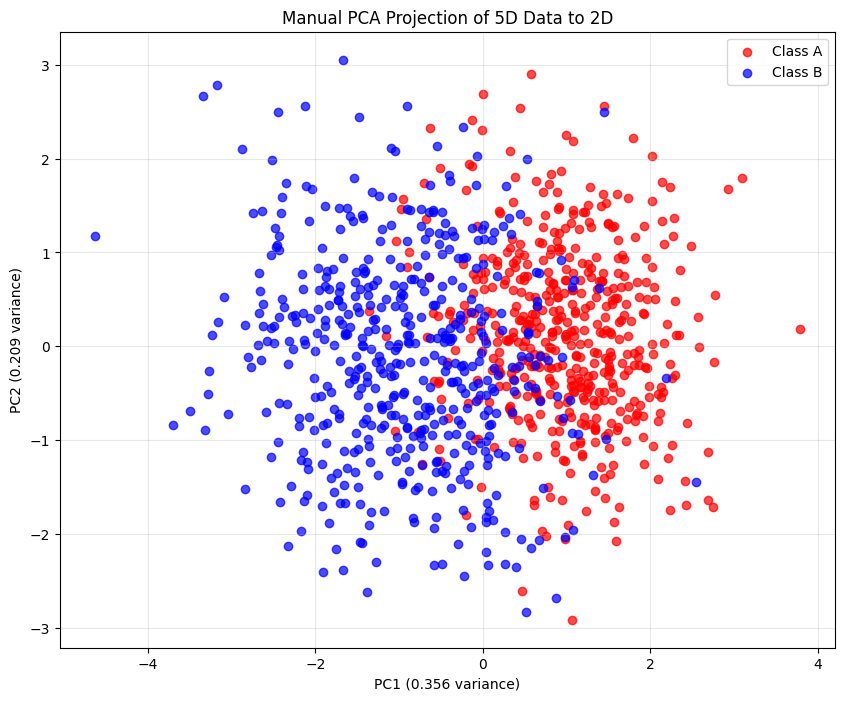

In [4]:
# Create scatter plot of 2D projection
plt.figure(figsize=(10, 8))
colors = ['red', 'blue']
class_names = ['Class A', 'Class B']

for i in range(2):
    mask = y == i
    plt.scatter(X_2d[mask, 0], X_2d[mask, 1], c=colors[i], label=class_names[i], alpha=0.7)

plt.xlabel(f'PC1 ({explained_var_ratio[0]:.3f} variance)')
plt.ylabel(f'PC2 ({explained_var_ratio[1]:.3f} variance)')
plt.title('Manual PCA Projection of 5D Data to 2D')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Analysis

After PCA projection, the classes show some overlap but remain distinguishable. The linear separability depends on the amount of variance captured by the first two principal components.